In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import os

In [3]:
# Load data
if os.path.exists('data.csv'):
    df = pd.read_csv('data.csv')
else:
    df = pd.read_csv('http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2018-01-17/data/listings.csv.gz', 
                      compression='gzip')
    df.to_csv('data.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16313 entries, 0 to 16312
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                16313 non-null  int64  
 1   listing_url                       16313 non-null  object 
 2   scrape_id                         16313 non-null  int64  
 3   last_scraped                      16313 non-null  object 
 4   name                              16302 non-null  object 
 5   summary                           15860 non-null  object 
 6   space                             11798 non-null  object 
 7   description                       16305 non-null  object 
 8   experiences_offered               16313 non-null  object 
 9   neighborhood_overview             10343 non-null  object 
 10  notes                             6734 non-null   object 
 11  transit                           10186 non-null  object 
 12  acce

In [5]:
# We will focus on three attributes only
df = df[['host_response_time','host_response_rate','review_scores_rating']]

print(df.head())
print(df.host_response_time.unique())

  host_response_time host_response_rate  review_scores_rating
0       within a day                60%                  89.0
1     within an hour               100%                  91.0
2     within an hour               100%                  79.0
3     within an hour               100%                  90.0
4     within an hour               100%                  80.0
['within a day' 'within an hour' 'within a few hours' nan
 'a few days or more']


In [6]:
df.host_response_rate = df.host_response_rate.str.strip("%")
df.host_response_rate = pd.to_numeric(df.host_response_rate)

print(df.info(), "\n")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16313 entries, 0 to 16312
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_time    13805 non-null  object 
 1   host_response_rate    13805 non-null  float64
 2   review_scores_rating  13118 non-null  float64
dtypes: float64(2), object(1)
memory usage: 382.5+ KB
None 

  host_response_time  host_response_rate  review_scores_rating
0       within a day                60.0                  89.0
1     within an hour               100.0                  91.0
2     within an hour               100.0                  79.0
3     within an hour               100.0                  90.0
4     within an hour               100.0                  80.0


In [14]:
df = df.dropna()

In [8]:
# Converting host_response_time attribute to categorical values.
# Two approaches:

# 1 - Encoding label encoder...
le = preprocessing.LabelEncoder()

arr = le.fit_transform(df.host_response_time)

df.host_response_time = arr

# 2 - ...OR alternative way 
df_label = df.apply(preprocessing.LabelEncoder().fit_transform)

In [9]:
print(arr)
df.head()

[1 3 3 ... 3 3 3]


,host_response_time,host_response_rate,review_scores_rating
0,1,60.0,89.0
1,3,100.0,91.0
2,3,100.0,79.0
3,3,100.0,90.0
4,3,100.0,80.0


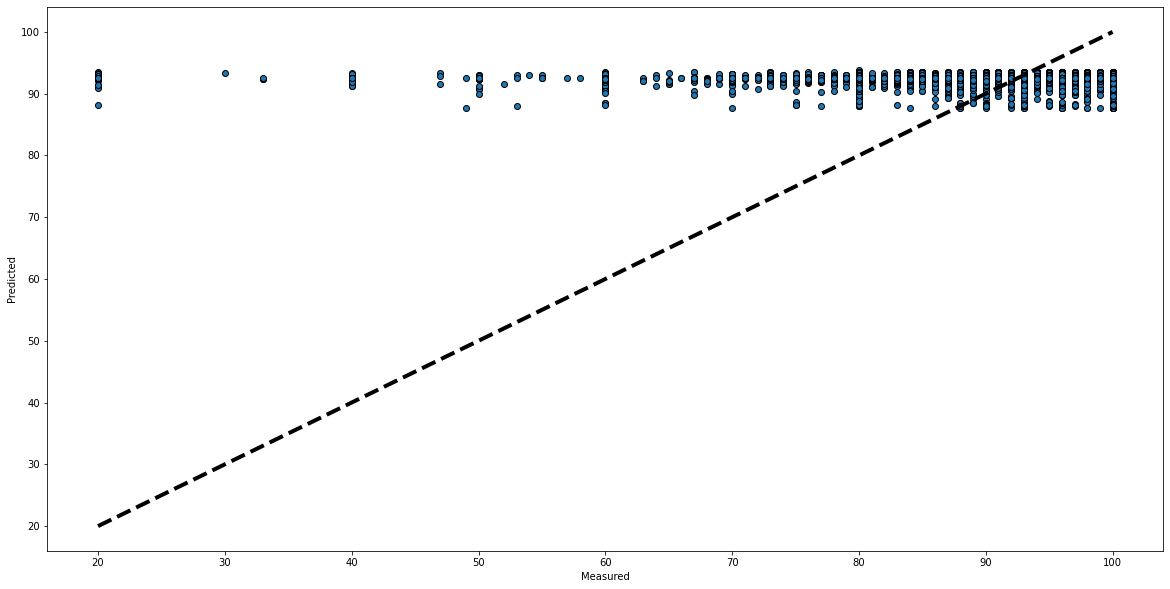

In [16]:
# Perform Linear Regression
lr = linear_model.LinearRegression()

# define labels and data (i.e y and X)
y = df.review_scores_rating
x = df.drop(columns="review_scores_rating")

predict = cross_val_predict(lr, x, y, cv=10)

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(y, predict, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [17]:
# Print pearson correlation coefficient a.k.a standard correlation coefficient
print(df.corr())

                      host_response_time  host_response_rate  \
host_response_time              1.000000            0.586101   
host_response_rate              0.586101            1.000000   
review_scores_rating            0.018660            0.066256   

                      review_scores_rating  
host_response_time                0.018660  
host_response_rate                0.066256  
review_scores_rating              1.000000  
